In [30]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [5]:
X_train, y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
 
X_test, y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

0

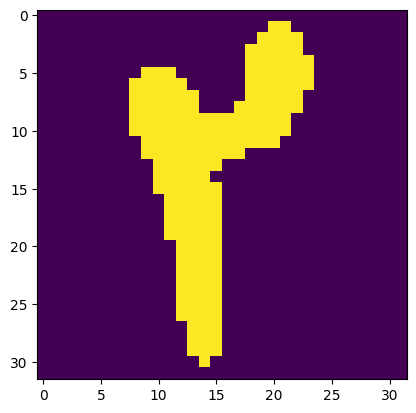

In [13]:
plt.imshow(X_test[5011].reshape([32,32]))
np.argmax(y_train[5011])

In [15]:
X_train.shape

(60000, 1024)

# Sequential API

مدل اول

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(1024,)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 300)               307500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 338,610
Trainable params: 338,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer('dense_1') is hidden1

False

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00923178, -0.00806609, -0.02824324, ...,  0.06451115,
        -0.03485316,  0.01872285],
       [-0.06049084,  0.01642044, -0.0612949 , ...,  0.03199931,
        -0.02458167, -0.01069077],
       [-0.05208577,  0.05571948, -0.01545679, ...,  0.03196584,
        -0.02617955,  0.04766054],
       ...,
       [-0.06695799, -0.00871189, -0.0244748 , ..., -0.00492945,
         0.05427197,  0.04776452],
       [ 0.00299396, -0.06182591, -0.01875252, ...,  0.0208014 ,
        -0.03645618,  0.06652813],
       [-0.06365489,  0.03466308,  0.02608062, ...,  0.03904786,
         0.01834881,  0.05177888]], dtype=float32)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [35]:
history = model.fit(X_train, y_train,validation_split=0.2 ,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0204 - accuracy: 0.9959 - val_loss: 0.0393 - val_accuracy: 0.9884
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0190 - accuracy: 0.9962 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0175 - accuracy: 0.9965 - val_loss: 0.0384 - val_accuracy: 0.9880
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0163 - accuracy: 0.9970 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0152 - accuracy: 0.9975 - val_loss: 0.0376 - val_accuracy: 0.9886
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0141 - accuracy: 0.9975 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0131 - accuracy: 0.9978 - val_loss: 0.0385 - val_ac

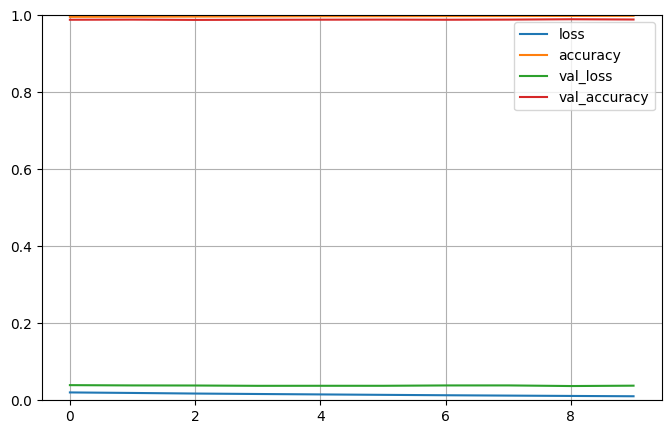

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

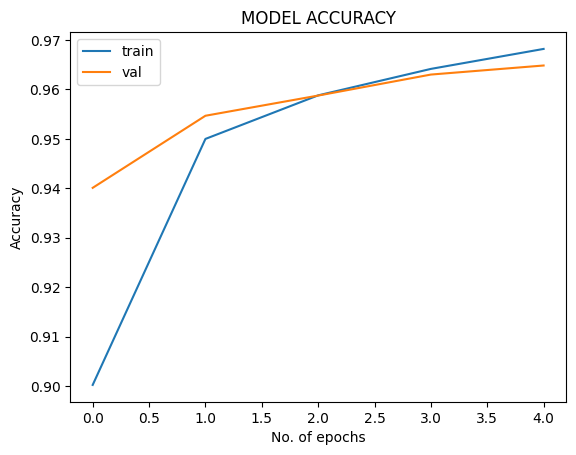

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.2379 - accuracy: 0.9312


[0.2378566861152649, 0.9311500191688538]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 444ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.53, 0.02, 0.  , 0.  , 0.  , 0.18, 0.22, 0.03, 0.01, 0.  ]],
      dtype=float32)

##### مدل دوم

In [38]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model2.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [40]:
model2.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [41]:
history2 = model.fit(X_train, y_train,validation_split=0.2 ,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3975 - accuracy: 0.9002 - val_loss: 0.2164 - val_accuracy: 0.9401
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1839 - accuracy: 0.9500 - val_loss: 0.1689 - val_accuracy: 0.9547
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1522 - accuracy: 0.9588 - val_loss: 0.1500 - val_accuracy: 0.9588
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1345 - accuracy: 0.9641 - val_loss: 0.1350 - val_accuracy: 0.9630
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1221 - accuracy: 0.9682 - val_loss: 0.1259 - val_accuracy: 0.9648


In [ ]:
y_predicted = model.predict(X_test)
y_predicted.shape

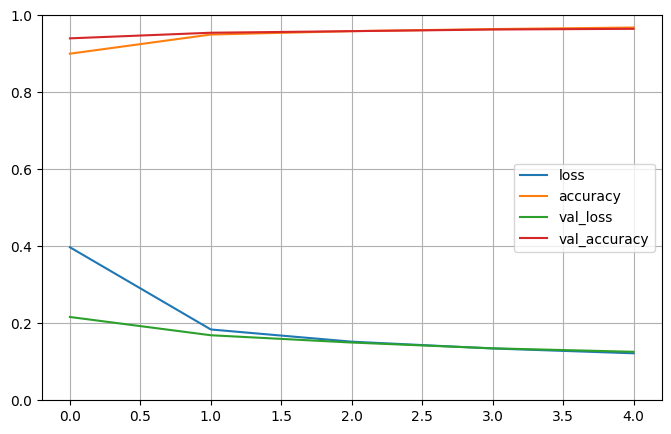

In [42]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

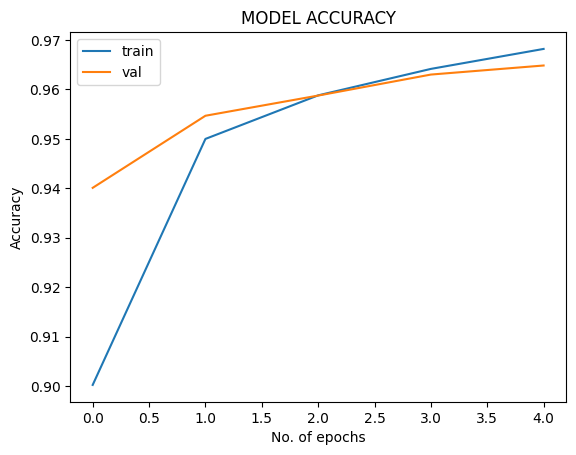

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

مدل سوم

In [73]:
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history3=model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0073 - accuracy: 0.9986
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0085 - accuracy: 0.9984
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0035 - accuracy: 0.9991
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0071 - accuracy: 0.9989
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0061 - accuracy: 0.9990
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0067 - accuracy: 0.9988
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0056 - accuracy: 0.9988
Epoch 10/10
1875/1875 [==============================] - 29s 15m

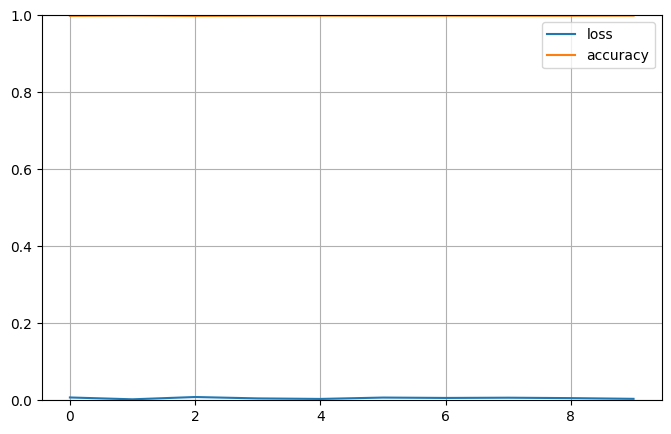

In [74]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

# Functional API

In [48]:
model_input = tf.keras.layers.Input(shape = (1024,))
output = tf.keras.layers.Flatten()(model_input)
output = tf.keras.layers.Dense(300, activation = 'relu')(output)
output = tf.keras.layers.Dense(100, activation = 'softmax')(output)
model_1 = tf.keras.Model(model_input, output)

In [54]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               307500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
Total params: 337,600
Trainable params: 337,600
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_1.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [52]:
history_1 = model_1.fit(X_train, y_train, epochs = 25, verbose = 1, validation_data =
         (X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4004 - accuracy: 0.9080 - val_loss: 0.3504 - val_accuracy: 0.8932
Epoch 2/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1733 - accuracy: 0.9530 - val_loss: 0.2908 - val_accuracy: 0.9143
Epoch 3/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1447 - accuracy: 0.9611 - val_loss: 0.2611 - val_accuracy: 0.9225
Epoch 4/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1278 - accuracy: 0.9661 - val_loss: 0.2416 - val_accuracy: 0.9299
Epoch 5/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1152 - accuracy: 0.9697 - val_loss: 0.2243 - val_accuracy: 0.9348
Epoch 6/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1054 - accuracy: 0.9721 - val_loss: 0.2086 - val_accuracy: 0.9388
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0972 - accuracy: 0.9748 - val_loss: 0.1961 - val_ac

In [55]:
model_1.evaluate(X_test,y_test)

625/625 [==============================] - 3s 5ms/step - loss: 0.1194 - accuracy: 0.9657


[0.11943712085485458, 0.965749979019165]

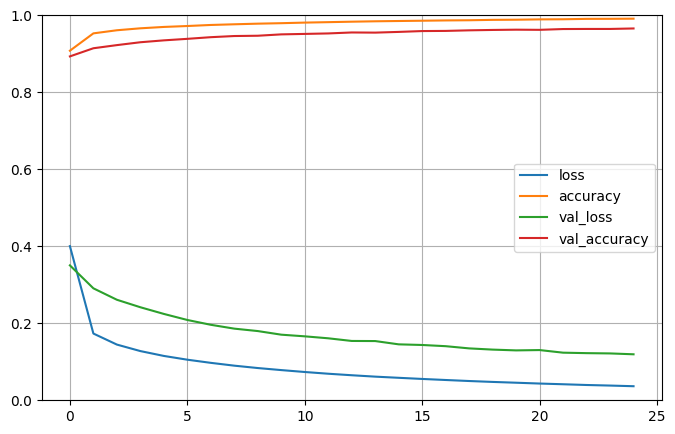

In [56]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

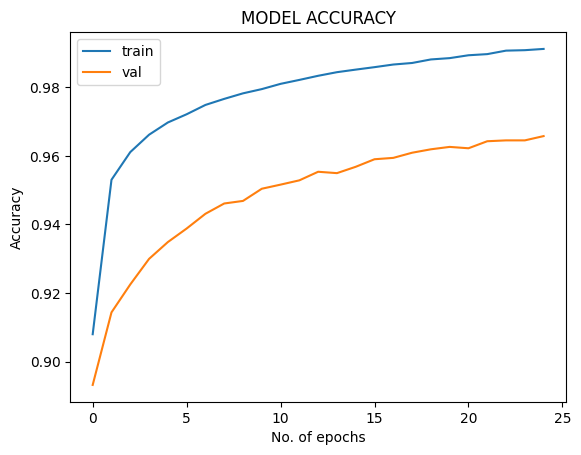

In [57]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

این مدل علکرد خوبی نداشته

In [67]:
input_ = keras.layers.Input(shape=[1024])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(100, activation="sigmoid")(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [66]:
model.compile(loss="mse", optimizer='sgd',metrics=['accuracy'])
history_2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 20.5369 - accuracy: 0.1121 - val_loss: 20.4999 - val_accuracy: 0.1076
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 20.4957 - accuracy: 0.1164 - val_loss: 20.4926 - val_accuracy: 0.1109
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 20.4783 - accuracy: 0.1131 - val_loss: 20.4663 - val_accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 20.4476 - accuracy: 0.0938 - val_loss: 20.4415 - val_accuracy: 0.0753
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 20.4312 - accuracy: 0.0815 - val_loss: 20.4309 - val_accuracy: 0.0683
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 20.4243 - accuracy: 0.0769 - val_loss: 20.4254 - val_accuracy: 0.0660
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 20.4205 - accuracy: 0.0735 - val_l

In [68]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
history_3 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1232 - accuracy: 0.9648 - val_loss: 0.1065 - val_accuracy: 0.9691
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0968 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.0967 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.1245 - val_accuracy: 0.9710
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.1228 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.1185 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.1191 -

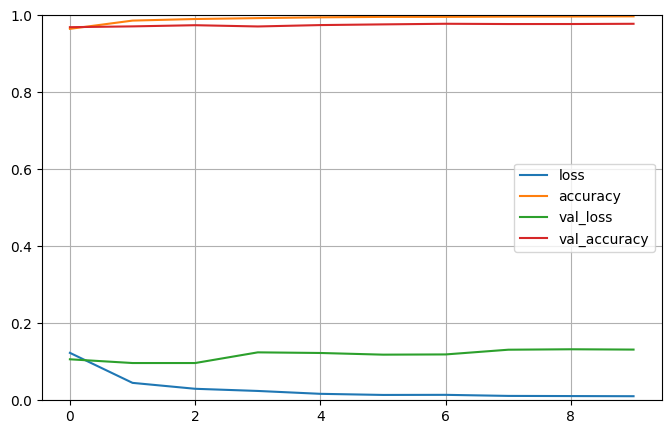

In [71]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

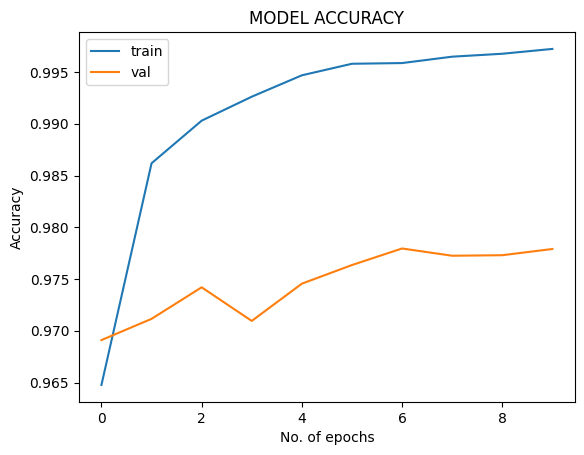

In [72]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()